In [1]:
#import Libraries
import numpy as np
import matplotlib.pyplot as plt
import random as random

In [2]:
#define alpha, the fine structure constant
alpha = 1/4*np.pi

#calculates the probabilty of any muon production from collision
#CME is the center of mass energy, in ours it should be 1.3**13 (13Tev)
#N is number of collisions
def muon_prod_sigma(CME, N, oclist):
    muon = []
    #bounce is an elastic collision, no muons
    bounce = []
    for i in range(N):
        rand_val = random.random()
        if rand_val <= (4*np.pi*alpha**2)/(3*CME):
            muon.append(i)
        else:
            bounce.append(i)
    #ends with addition to list of successful muon creation percentage at different energies
    oclist.append(len(muon)/N)

In [3]:
#little code test- seems to make sense
#s_vals is in GeV (10**9 ev or .001Tev)
#13Tev is 13,000 Gev
N = 1000
s_vals = [1, 5, 10, 50, 100]
occurences = []
for j in range(len(s_vals)):
    muon_prod_sigma(s_vals[j], N, occurences)
print(occurences)

[1.0, 0.528, 0.275, 0.051, 0.034]


<function matplotlib.pyplot.show(close=None, block=None)>

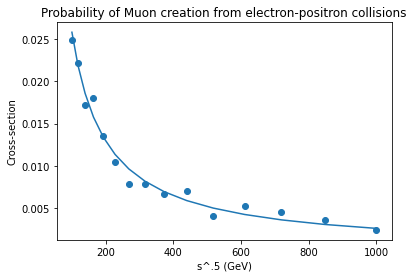

In [5]:
#bigger test with 1000 collisions and energy from 100-1000 gev
N = 10**4
s_vals = np.logspace(2, 3, 15)
occurences = []
for j in range(len(s_vals)):
    muon_prod_sigma(s_vals[j], N, occurences)

#plot line of expected cross section value
x = np.array(np.logspace(2, 3, 15))
y = (4*np.pi*alpha**2)/(3*x)
plt.plot(x, y)

#plot actual values from random test done earlier
plt.scatter(s_vals, occurences)
plt.title("Probability of Muon creation from electron-positron collisions")
plt.ylabel("Cross-section")
plt.xlabel("s^.5 (GeV)")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

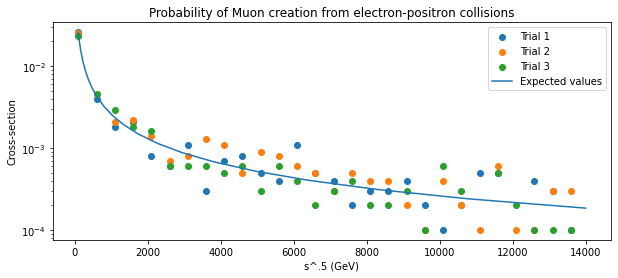

In [7]:
#try 10000 collisions 3 times and plot against expected curve
N = 10000
s_vals = range(100, 14100, 500)
occurences1 = []
for j in range(len(s_vals)):
    muon_prod_sigma(s_vals[j], N, occurences1)

occurences2 = []
for j in range(len(s_vals)):
    muon_prod_sigma(s_vals[j], N, occurences2)

occurences3 = []
for j in range(len(s_vals)):
    muon_prod_sigma(s_vals[j], N, occurences3)

x = np.array(np.logspace(2, 4.1461280356783, 20))
y = (4*np.pi*alpha**2)/(3*x)

root_s = np.sqrt(s_vals)

plt.figure(figsize=(10, 4))
plt.scatter(s_vals, occurences1)
plt.scatter(s_vals, occurences2)
plt.scatter(s_vals, occurences3)
plt.plot(x, y)
plt.yscale('log')
plt.title("Probability of Muon creation from electron-positron collisions")
plt.ylabel("Cross-section")
plt.xlabel("s^.5 (GeV)")
plt.legend(["Trial 1", "Trial 2", "Trial 3","Expected values"])
plt.show